# **Hypothesis Testing**

Joseph Lardie

September 2023

# **Imports**

In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
import plotly

# Scipy
from scipy import stats
from scipy.stats import norm, pearsonr, zscore
import statsmodels.api as sm

# Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading in datasets**

In [2]:
# Loading NYC Restaraunt Inspection Data
rdf = pd.read_csv('rdf')

In [3]:
# Loading NYC Restaraunt Yelp Review Data
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242682 entries, 0 to 242681
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  242682 non-null  int64  
 1   DBA                    241853 non-null  object 
 2   BORO                   242682 non-null  object 
 3   BUILDING               242284 non-null  object 
 4   STREET                 242668 non-null  object 
 5   ZIPCODE                239855 non-null  float64
 6   CUISINE DESCRIPTION    239995 non-null  object 
 7   INSPECTION DATE        242682 non-null  object 
 8   ACTION                 239995 non-null  object 
 9   VIOLATION CODE         238662 non-null  object 
 10  VIOLATION DESCRIPTION  238662 non-null  object 
 11  CRITICAL FLAG          242682 non-null  object 
 12  SCORE                  230796 non-null  float64
 13  GRADE                  116932 non-null  object 
 14  GRADE DATE             107898 non-nu

In [5]:
# Yelp data
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         847 non-null    object 
 1   name          847 non-null    object 
 2   image_url     847 non-null    object 
 3   url           847 non-null    object 
 4   review_count  847 non-null    int64  
 5   categories    847 non-null    object 
 6   rating        847 non-null    float64
 7   coordinates   847 non-null    object 
 8   transactions  847 non-null    object 
 9   location      847 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.3+ KB


## **Selecting Subset of Pizza Restaurants in Brooklyn**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rdf[rdf['BORO'].str.lower() == 'brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower() == 'pizza')]

In [8]:
# Filtering out rows with NaN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Taking a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                             DBA      BORO BUILDING  \
188     40580683  THE ORIGINAL PIZZA OF AVENUE L  Brooklyn     9514   
288     50132133                        ELEGANTE  Brooklyn     6922   
789     40645559                  BAYRIDGE PIZZA  Brooklyn     7704   
1124    50048923                Milly's Pizzeria  Brooklyn      834   
1384    50070118         BARCKLAYS PIZZA & PASTA  Brooklyn      916   
...          ...                             ...       ...      ...   
242013  50142813              SURF PIZZA & WINGS  Brooklyn     2115   
242298  50116736             FEDERICO'S PIZZERIA  Brooklyn     2313   
242468  50098909        99 CENTS UTICA HOT PIZZA  Brooklyn     1127   
242549  40745618                    MIKE'S PIZZA  Brooklyn      905   
242681  41038600                   LIBERTY PIZZA  Brooklyn      482   

                 STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
188            AVENUE L  11236.0               Pizza      10/07/2022   
288

## **Merging Yelp data with Inspections Data**

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the restaurants 
merged_df = pd.merge(pizza_brooklyn_subset, ydf, left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows
merged_df.drop_duplicates(inplace=True)

# Displaying the merged dataframe
print("\nMerged DataFrame:")
print(merged_df)


Merged DataFrame:
        CAMIS           DBA      BORO BUILDING               STREET  ZIPCODE  \
0    50089510  ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE  11211.0   
1    50089510  ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE  11211.0   
2    50089510  ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE  11211.0   
3    50089510  ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE  11211.0   
4    50089510  ROSA'S PIZZA  Brooklyn      374  METROPOLITAN AVENUE  11211.0   
..        ...           ...       ...      ...                  ...      ...   
645  50115949        CROSTA  Brooklyn      486             6 AVENUE  11215.0   
646  41404362   COZZI PIZZA  Brooklyn      584             BROADWAY  11206.0   
647  41404362   COZZI PIZZA  Brooklyn      584             BROADWAY  11206.0   
648  41404362   COZZI PIZZA  Brooklyn      584             BROADWAY  11206.0   
649  50124417    OMA GRASSA  Brooklyn      753        FULTON STREET  11217.0   

    CUISINE DESCRIPT

In [12]:
# looking at the new dataframe
merged_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,...,name,image_url,url,review_count,categories,rating,coordinates,transactions,location,_merge
0,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,11/06/2023,Violations were cited in the following area(s).,04L,...,ROSA'S PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/TtcGEK...,https://www.yelp.com/biz/rosas-pizza-brooklyn?...,197,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 40.7139499, 'longitude': -73.95563}","['pickup', 'delivery']","{'address1': '374 Metropolitan Ave', 'address2...",both
1,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,11/06/2023,Violations were cited in the following area(s).,04L,...,ROSA'S PIZZA,https://s3-media3.fl.yelpcdn.com/bphoto/LkyJHL...,https://www.yelp.com/biz/rosas-pizza-ridgewood...,320,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 40.712192, 'longitude': -73.899997}",[],"{'address1': '6265 Fresh Pond Rd', 'address2':...",both
2,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,11/06/2023,Violations were cited in the following area(s).,04L,...,ROSA'S PIZZA,https://s3-media2.fl.yelpcdn.com/bphoto/kUUoKn...,https://www.yelp.com/biz/rosas-pizza-new-york-...,46,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.750454562128176, 'longitude': ...","['delivery', 'pickup']","{'address1': '425 7th Ave', 'address2': '', 'a...",both
3,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,11/06/2023,Violations were cited in the following area(s).,04L,...,ROSA'S PIZZA,https://s3-media1.fl.yelpcdn.com/bphoto/CYyFjo...,https://www.yelp.com/biz/rosas-pizza-maspeth-2...,458,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.72697, 'longitude': -73.89564}",[],"{'address1': '5526 69th St', 'address2': '', '...",both
4,50089510,ROSA'S PIZZA,Brooklyn,374,METROPOLITAN AVENUE,11211.0,Pizza,11/06/2023,Violations were cited in the following area(s).,04A,...,ROSA'S PIZZA,https://s3-media4.fl.yelpcdn.com/bphoto/TtcGEK...,https://www.yelp.com/biz/rosas-pizza-brooklyn?...,197,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 40.7139499, 'longitude': -73.95563}","['pickup', 'delivery']","{'address1': '374 Metropolitan Ave', 'address2...",both


In [13]:
# Looking at the merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 649
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  631 non-null    int64   
 1   DBA                    631 non-null    object  
 2   BORO                   631 non-null    object  
 3   BUILDING               631 non-null    object  
 4   STREET                 631 non-null    object  
 5   ZIPCODE                623 non-null    float64 
 6   CUISINE DESCRIPTION    631 non-null    object  
 7   INSPECTION DATE        631 non-null    object  
 8   ACTION                 631 non-null    object  
 9   VIOLATION CODE         628 non-null    object  
 10  VIOLATION DESCRIPTION  628 non-null    object  
 11  CRITICAL FLAG          631 non-null    object  
 12  SCORE                  631 non-null    float64 
 13  GRADE                  631 non-null    object  
 14  GRADE DATE             631 non-null    obj

In [14]:
# Use boolean indexing to filter rows where the 'name_column' matches the target name
specific_restaurant = merged_df[merged_df['name'] == 'FRONT STREET PIZZA']

# Print or further process the specific restaurant data
print(specific_restaurant)

        CAMIS                 DBA      BORO BUILDING        STREET  ZIPCODE  \
312  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
313  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
314  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
315  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
316  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   
317  50124791  FRONT STREET PIZZA  Brooklyn       80  FRONT STREET  11201.0   

    CUISINE DESCRIPTION INSPECTION DATE  \
312               Pizza      03/20/2023   
313               Pizza      07/08/2024   
314               Pizza      03/20/2023   
315               Pizza      03/20/2023   
316               Pizza      03/20/2023   
317               Pizza      07/08/2024   

                                              ACTION VIOLATION CODE  ...  \
312  Violations were cited in the following area(s).            10F 

In [15]:
# Saving the merged dataframe to upload into other notebooks
merged_df.to_csv('mdf', index=False)

## **Feature Engineering**

In [16]:
# Assuming 'transactions' is a list of transaction types
merged_df['Has Delivery'] = merged_df['transactions'].apply(lambda x: 'delivery' in x)
merged_df['Has Pickup'] = merged_df['transactions'].apply(lambda x: 'pickup' in x)

In [17]:
# Define review count bins
review_count_bins = [0, 50, 100, 200, np.inf]
review_count_labels = ['Low', 'Moderate', 'High', 'Very High']

# Create 'Review Count Category' column
merged_df['Review Count Category'] = pd.cut(merged_df['review_count'], bins=review_count_bins, labels=review_count_labels)


In [18]:
# Assuming 'VIOLATION CODE' column is available
merged_df['Violation Count'] = merged_df.groupby('CAMIS')['VIOLATION CODE'].transform('count')

In [19]:
merged_df['Rating - Score Difference'] = merged_df['rating'] - merged_df['SCORE']

In [20]:
# Define size categories
size_bins = [0, 50, 200, np.inf]
size_labels = ['Small', 'Medium', 'Large']

# Create 'Size Category' column
merged_df['Size Category'] = pd.cut(merged_df['review_count'], bins=size_bins, labels=size_labels)

# **Data Cleaning**

In [21]:
# Creating a new column 'unique_id' by combining 'name' and 'CAMIS'
merged_df['unique_id'] = merged_df['name'] + '_' + merged_df['CAMIS'].astype(str)

# Sorting the DataFrame based on the new 'unique_id' column
merged_df = merged_df.sort_values(by='unique_id')

# If you want to keep only the last occurrence of each unique identifier, you can use the following:
merged_df = merged_df.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['unique_id'], keep='last')

In [22]:
# Dropping irrelevant columns
merged_df.drop(['_merge', 'GRADE', 'BUILDING', 'ZIPCODE', 'Council District', 'Longitude', 'Latitude', 'coordinates', 'url','CRITICAL FLAG', 'alias', 'categories'], axis=1, inplace=True)

In [23]:
# checking missing data in data 
def check_missing_data(rdf):
    total = merged_df.isnull().sum().sort_values(ascending = False)
    percent = (merged_df.isnull().sum()/merged_df.isnull().count()*100).sort_values(ascending = False)
    percent = percent.round(2).astype(str) + '%'
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_result = check_missing_data(merged_df)
missing_data_result.head()

,Total,Percent
VIOLATION CODE,1,1.2%
VIOLATION DESCRIPTION,1,1.2%
CAMIS,0,0.0%
review_count,0,0.0%
Size Category,0,0.0%


In [24]:
# Function to eliminate rows with missing Grade dates
def eliminate_missing_grade_date_rows(merged_df):
    """
    Eliminate rows with missing data in the "GRADE DATE" column.

    Returns:
    - Cleaned DataFrame without rows with missing "GRADE DATE"
    """
    # Drop rows with missing values in the "GRADE DATE" column
    cleaned_dataframe = merged_df.dropna(subset=["GRADE DATE"])

    return cleaned_dataframe

merged_df = eliminate_missing_grade_date_rows(merged_df)

In [25]:
# looking at the types of Inspections
merged_df['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection              37
Cycle Inspection / Re-inspection                   26
Pre-permit (Operational) / Initial Inspection      13
Cycle Inspection / Reopening Inspection             4
Pre-permit (Operational) / Re-inspection            2
Pre-permit (Operational) / Reopening Inspection     1
Name: INSPECTION TYPE, dtype: int64

In [26]:
# Filtering out only the initial inspections and re-inspections
def filter_inspection_type(merged_df):
    """
    Filter rows based on the values in the "INSPECTION TYPE" column.

    Returns:
    - DataFrame containing only rows with specified inspection types
    """
    inspection_types_to_keep = ['Cycle Inspection / Initial Inspection', 'Cycle Inspection / Re-inspection']
    filtered_rdf = merged_df.loc[merged_df['INSPECTION TYPE'].isin(inspection_types_to_keep)]

    return filtered_rdf

merged_df = filter_inspection_type(merged_df)

In [27]:
#create a dataframe with the most recent inspection data
merged_df = merged_df.sort_values(by='INSPECTION DATE').drop_duplicates(subset=['CAMIS'], keep='last')

In [28]:
# Viewing the cleaaned dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 188 to 348
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CAMIS                      63 non-null     int64   
 1   DBA                        63 non-null     object  
 2   BORO                       63 non-null     object  
 3   STREET                     63 non-null     object  
 4   CUISINE DESCRIPTION        63 non-null     object  
 5   INSPECTION DATE            63 non-null     object  
 6   ACTION                     63 non-null     object  
 7   VIOLATION CODE             62 non-null     object  
 8   VIOLATION DESCRIPTION      62 non-null     object  
 9   SCORE                      63 non-null     float64 
 10  GRADE DATE                 63 non-null     object  
 11  INSPECTION TYPE            63 non-null     object  
 12  name                       63 non-null     object  
 13  image_url                  63 non-

In [29]:
# viewing the dataset at a glance
merged_df.describe()

,CAMIS,SCORE,review_count,rating,Violation Count,Rating - Score Difference
count,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000
mean,4.592912e+07,12.460317,324.730159,3.769841,8.285714,-8.690476
std,4.527918e+06,8.601998,655.313449,0.537508,9.666084,8.680916
min,4.038630e+07,0.000000,22.000000,1.500000,1.000000,-55.000000
25%,4.128497e+07,8.500000,81.500000,3.500000,4.000000,-9.000000
50%,5.000195e+07,12.000000,200.000000,4.000000,5.000000,-8.000000
75%,5.007873e+07,13.000000,288.000000,4.000000,8.000000,-4.750000
max,5.014048e+07,59.000000,4219.000000,4.500000,54.000000,4.000000


In [30]:
#count number of unique names
len(merged_df['name'].unique())

53

In [31]:
#count number of unique names
len(merged_df['CAMIS'].unique())

63

In [32]:
# Ensuring that there are no duplicate restaurants
merged_df['unique_id'].value_counts()

TONY'S PIZZA_41702359                   1
L'ARTE DELLA PIZZA BROOKLYN_50088788    1
BATTLE HILL TAVERN_50075379             1
ARTICHOKE BASILLE'S PIZZA_50057006      1
TWO BOOTS_50016817                      1
                                       ..
MY LITTLE PIZZERIA_40593848             1
ENOTECA ON COURT_41296556               1
WHEATED_50000967                        1
KRISPY PIZZA_40592791                   1
ROBERTA'S_41307383                      1
Name: unique_id, Length: 63, dtype: int64

## **Identifying Outliers**

In [33]:
# Calculate Z-scores for SCORE, rating, and review_count
merged_df['SCORE_zscore'] = zscore(merged_df['SCORE'])
merged_df['rating_zscore'] = zscore(merged_df['rating'])
merged_df['review_count_zscore'] = zscore(merged_df['review_count'])

# Set a Z-score threshold for identifying outliers (e.g., 3)
zscore_threshold = 3

# Identify outliers based on the Z-score
outliers_SCORE = merged_df[abs(merged_df['SCORE_zscore']) > zscore_threshold]
outliers_rating = merged_df[abs(merged_df['rating_zscore']) > zscore_threshold]
outliers_review_count = merged_df[abs(merged_df['review_count_zscore']) > zscore_threshold]

# Display or further analyze the identified outliers
print("Outliers in SCORE:")
print(outliers_SCORE)

print("\nOutliers in Ratings:")
print(outliers_rating)

print("\nOutliers in Review Count:")
print(outliers_review_count)

# Remove the temporary columns with Z-scores if needed
merged_df = merged_df.drop(['SCORE_zscore', 'rating_zscore', 'review_count_zscore'], axis=1)

Outliers in SCORE:
       CAMIS           DBA      BORO               STREET CUISINE DESCRIPTION  \
42  50089510  ROSA'S PIZZA  Brooklyn  METROPOLITAN AVENUE               Pizza   

   INSPECTION DATE                                           ACTION  \
42      11/06/2023  Violations were cited in the following area(s).   

   VIOLATION CODE                              VIOLATION DESCRIPTION  SCORE  \
42            08A  Establishment is not free of harborage or cond...   59.0   

    ... Has Delivery Has Pickup Review Count Category Violation Count  \
42  ...         True       True                   Low              44   

    Rating - Score Difference  Size Category              unique_id  \
42                      -55.0          Small  ROSA'S PIZZA_50089510   

   SCORE_zscore  rating_zscore  review_count_zscore  
42     5.453791       0.431636            -0.428755  

[1 rows x 28 columns]

Outliers in Ratings:
        CAMIS                        DBA      BORO    STREET  \
363  5008

### **Dropping Outliers**

In [34]:
# Remove outliers identified in SCORE, rating, and review_count
merged_df = merged_df.drop(outliers_SCORE.index, axis=0)
merged_df = merged_df.drop(outliers_rating.index, axis=0)
merged_df = merged_df.drop(outliers_review_count.index, axis=0)

# Reset the index after removing rows
merged_df = merged_df.reset_index(drop=True)

# Display the modified DataFrame without outliers
print("DataFrame after removing outliers:")
print(merged_df)

DataFrame after removing outliers:
       CAMIS                                  DBA      BORO  \
0   41702359                         TONY'S PIZZA  Brooklyn   
1   50001003                              FORNINO  Brooklyn   
2   50104265          PUBLIC DISPLAY OF AFFECTION  Brooklyn   
3   50140482                           FINI PIZZA  Brooklyn   
4   50092765                             PIZZETTE  Brooklyn   
5   50066244                              IMPASTO  Brooklyn   
6   40887949              DANNY'S PIZZERIA & CAFE  Brooklyn   
7   50084972                          JOE'S PIZZA  Brooklyn   
8   50001952                              FORNINO  Brooklyn   
9   41434872                SAL & PAUL'S PIZZERIA  Brooklyn   
10  41393052                            IGNAZIO'S  Brooklyn   
11  50037645                          JOE'S PIZZA  Brooklyn   
12  50080431                       SAUCE AND SODA  Brooklyn   
13  41196869                          LAYLA JONES  Brooklyn   
14  40386303        

## **Visualizations**

In [35]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = merged_df[(merged_df['review_count'] >= 75) & (merged_df['SCORE'] < 60)]

In [36]:
# Filtering out the restaurants with more review counts and better scores
df_filtered = merged_df[(merged_df['review_count'] >= 200)]

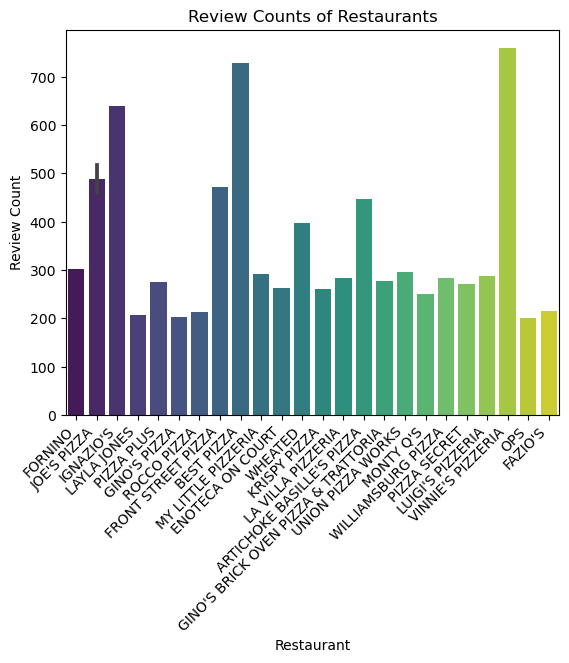

In [37]:
# Bar plot for review counts
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='name', y='review_count', data=df_filtered, palette='viridis')
plt.title('Review Counts of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right');

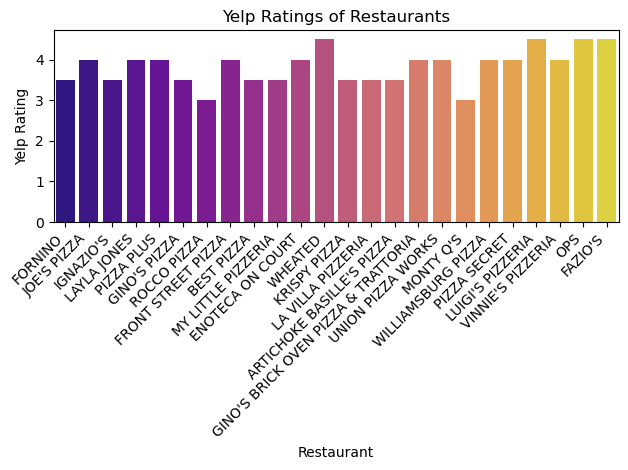

In [38]:
# Bar plot for Yelp ratings
plt.subplot(1, 1, 1)
sns.barplot(x='name', y='rating', data=df_filtered, palette='plasma')
plt.title('Yelp Ratings of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Yelp Rating')
plt.xticks(rotation=45, ha='right')
# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

# **Hypothesis Testing**

## **Hypothesis Test 1:Try to find a correlation between ratings and review counts on YELP**

- The null hypothesis for this question would be that the rating does not significantly affect the number of reviews on Yelp for pizza restaurants in Brooklyn NY

- The alternative hypothesis for this question would be that the rating does significantly affect the number of reviews on Yelp for the pizza restaurants in Brooklyn NY.

In [39]:
# Performing Pearsonr correlation test
correlation, p_value = pearsonr(merged_df['review_count'], merged_df['rating'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: -0.08
P-value: 0.5597
There is no significant correlation.


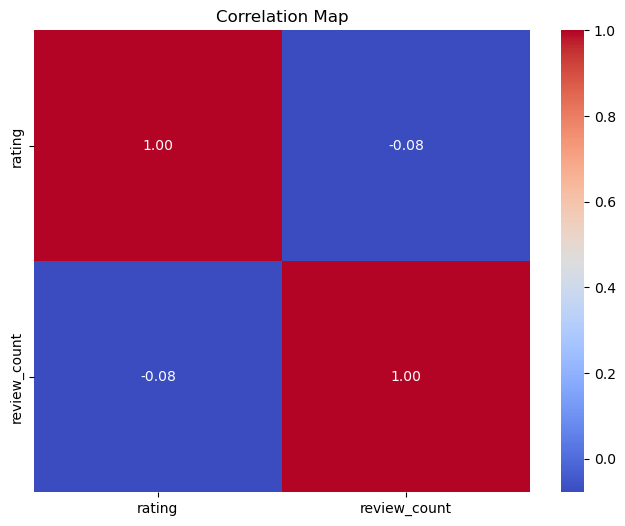

In [40]:
numeric_columns = ['rating', 'review_count']

mdf_numeric = merged_df[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

c_matrix = mdf_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

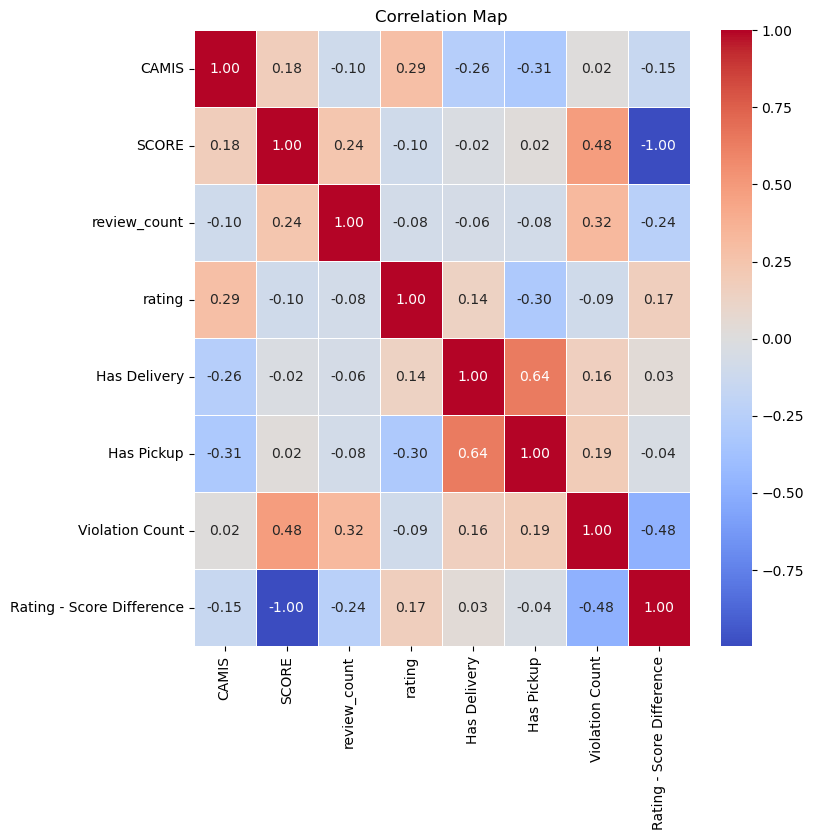

In [41]:
# Computing a correlation matrix to check for any correlation
correlation_matrix = merged_df.corr()

# Plot the correlation heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

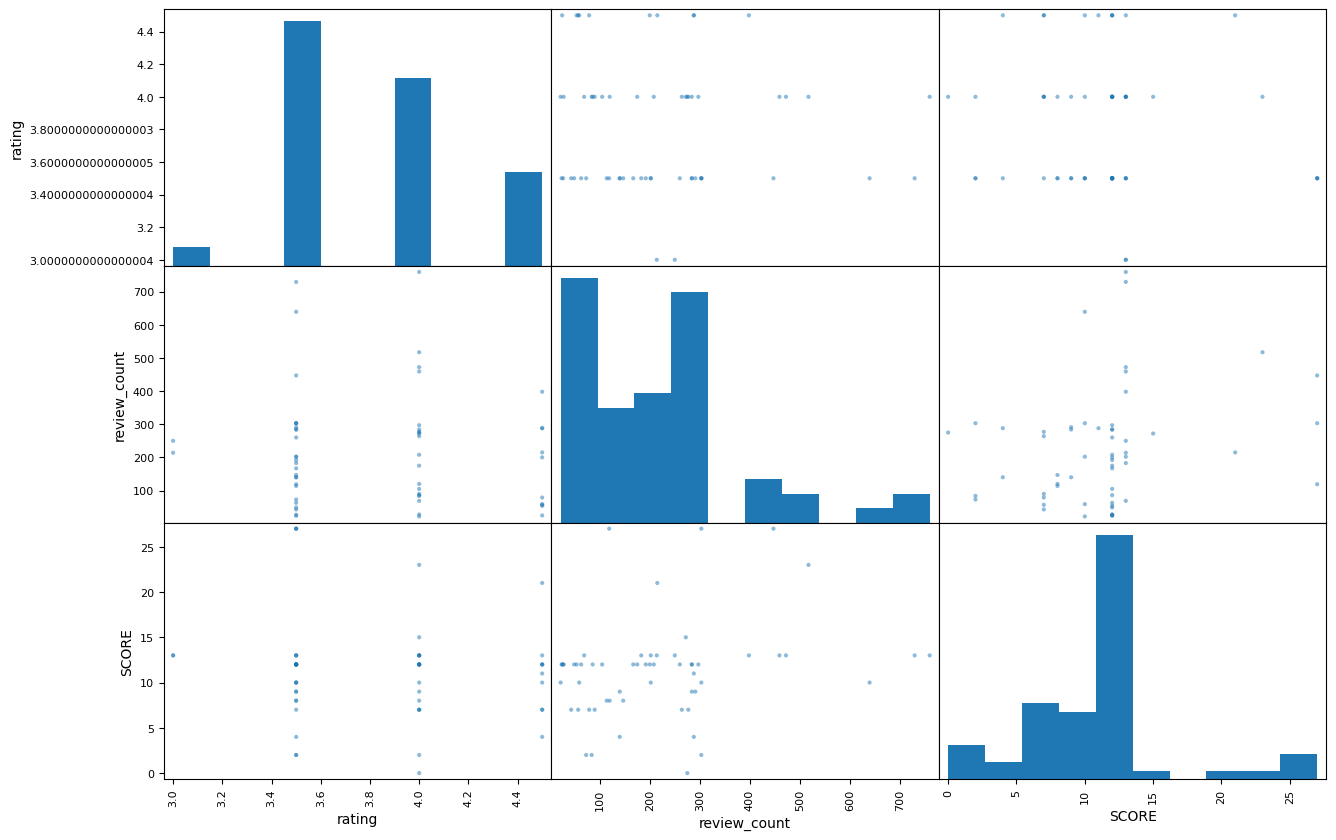

In [42]:
#create a scatter plot matrix for the merged dataframe
pd.plotting.scatter_matrix(merged_df[['rating','review_count', 'SCORE']], 
                           figsize=(15, 10));

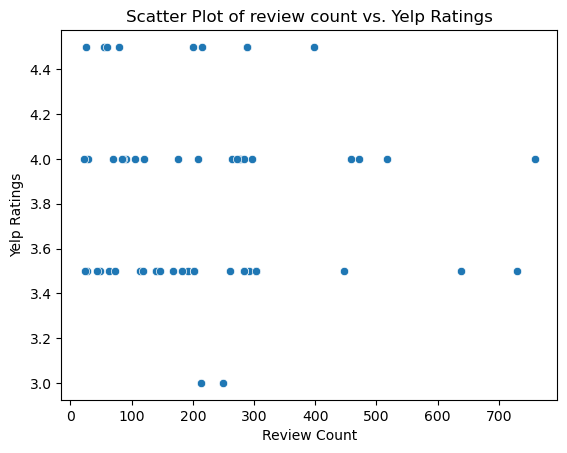

In [43]:
# Visualizing the correlation between review count and Yelp Ratings
sns.scatterplot(x=merged_df['review_count'], y=merged_df['rating'])
plt.title('Scatter Plot of review count vs. Yelp Ratings')
plt.xlabel('Review Count')
plt.ylabel('Yelp Ratings')
plt.show()

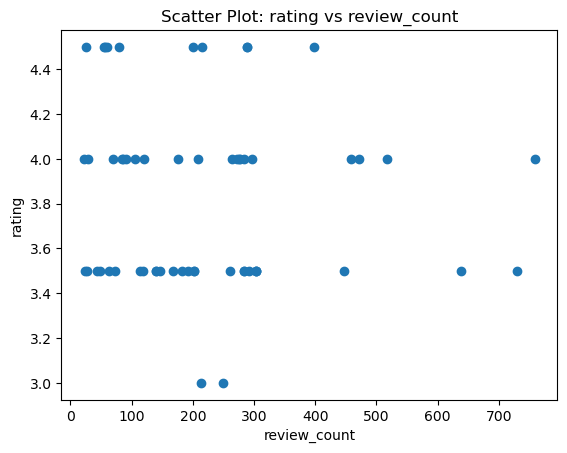

In [44]:
# Scatterplot 
plt.scatter(merged_df['review_count'], merged_df['rating'])
plt.xlabel('review_count')
plt.ylabel('rating')
plt.title('Scatter Plot: rating vs review_count')
plt.show()

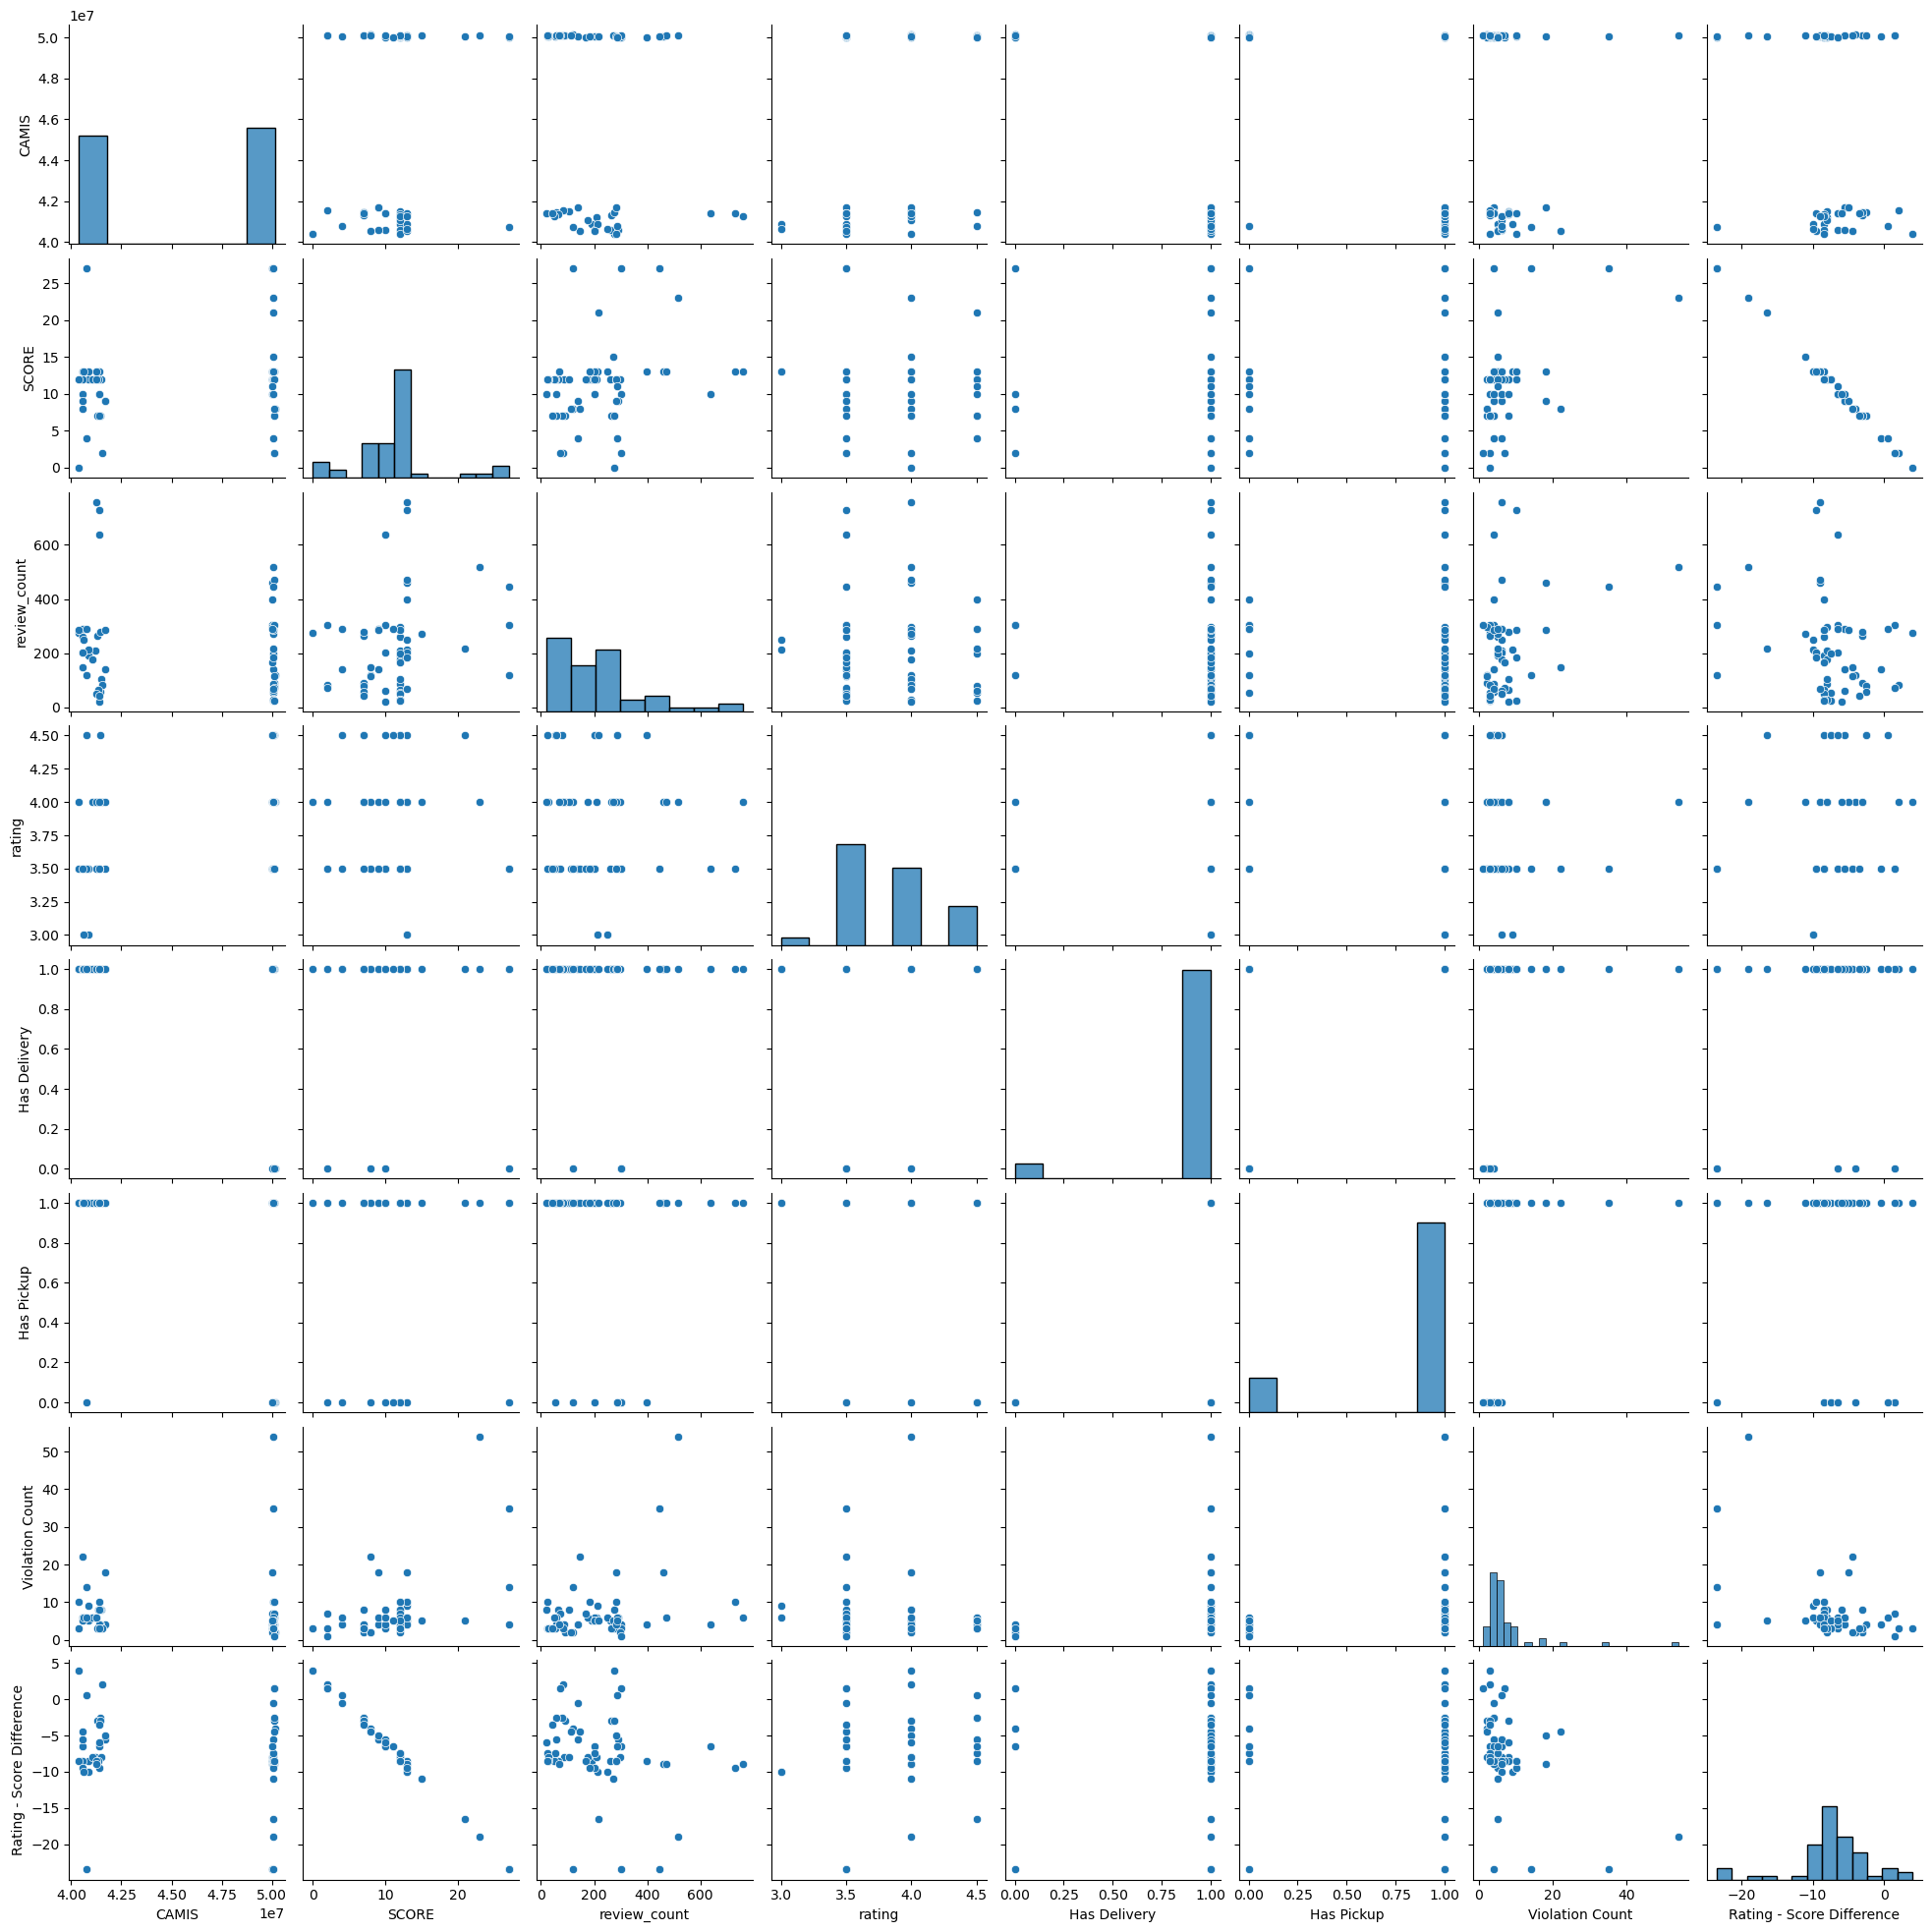

In [45]:
# Pairplot of the merged dataframe
sns.pairplot(merged_df)
plt.show()

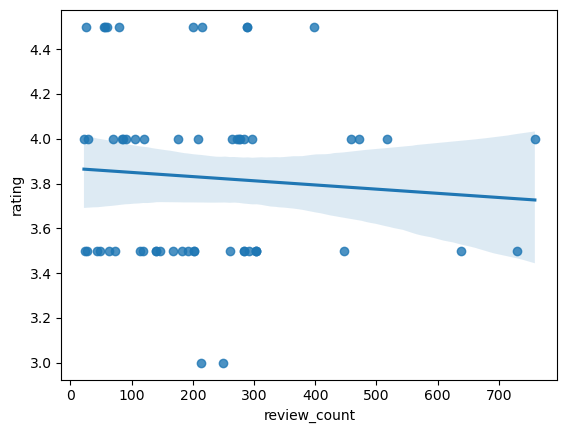

In [46]:
# Reggesion plot
sns.regplot(x='review_count', y='rating', data=merged_df)
plt.show()

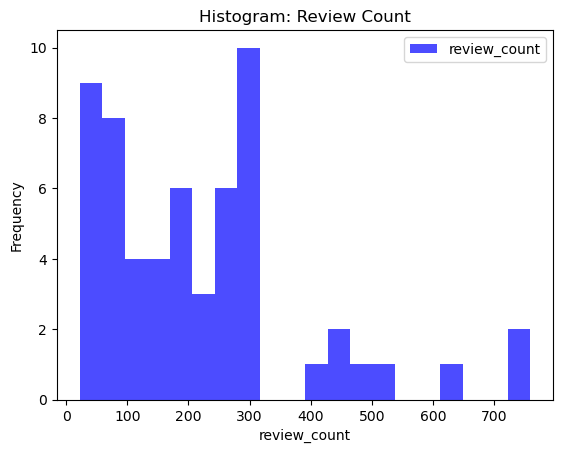

In [47]:
# Histogram 
plt.hist(merged_df['review_count'], bins=20, color='blue', alpha=0.7, label='review_count')
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Histogram: Review Count')
plt.legend()
plt.show()

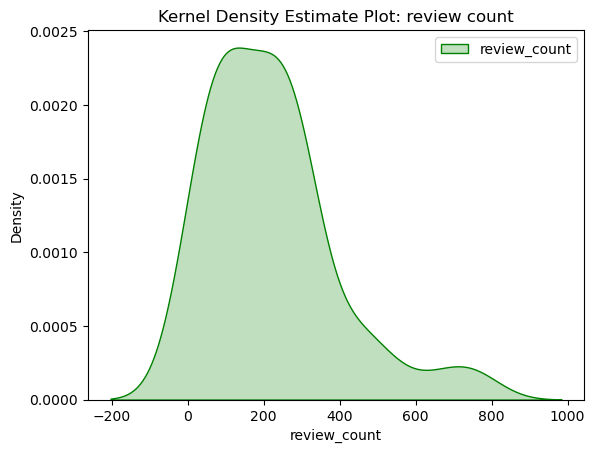

In [48]:
# Kernel Density Estimate Plot
sns.kdeplot(merged_df['review_count'], shade=True, color='green', label='review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot: review count')
plt.legend()
plt.show()

## **Hypothesis Test 2:Try to find correlation between the inspection scores and the review counts on Yelp**

- Null Hypothesis: There is no significant correlation between the inspection score and the review count on Yelp

- Alternative Hypothesis: There is a significant correlation between the inspection score and the review count on Yelp.

In [49]:
review_count = merged_df['review_count']
score = merged_df['SCORE']

# Calculate IQR
Q1 = review_count.quantile(0.25)
Q3 = review_count.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (review_count < Q1 - 1.5 * IQR) | (review_count > Q3 + 1.5 * IQR)

# Print outliers
print("Outliers:")
print(merged_df[outliers])

Outliers:
       CAMIS                DBA      BORO            STREET  \
10  41393052          IGNAZIO'S  Brooklyn      WATER STREET   
24  41411423         BEST PIZZA  Brooklyn  HAVEMEYER STREET   
47  41250435  VINNIE'S PIZZERIA  Brooklyn    BEDFORD AVENUE   

   CUISINE DESCRIPTION INSPECTION DATE  \
10               Pizza      05/08/2023   
24               Pizza      07/22/2024   
47               Pizza      12/06/2023   

                                             ACTION VIOLATION CODE  \
10  Violations were cited in the following area(s).            02G   
24  Violations were cited in the following area(s).            04N   
47  Violations were cited in the following area(s).            02G   

                                VIOLATION DESCRIPTION  SCORE  ... rating  \
10  Cold TCS food item held above 41 °F; smoked or...   10.0  ...    3.5   
24  Filth flies or food/refuse/sewage associated w...   13.0  ...    3.5   
47  Cold TCS food item held above 41 °F; smoked or...   13.

In [50]:
# Perform Pearson correlation test
if len(merged_df['review_count']) < 2 or len(merged_df['SCORE']) < 2:
    print("Not enough data points to perform the correlation test.")
else:
    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_df['review_count'], merged_df['SCORE'])

    # Print results
    print(f'Correlation: {correlation:.2f}')
    print(f'P-value: {p_value:.4f}')

    # Check for significance based on the p-value
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('There is no significant correlation.')

Correlation: 0.24
P-value: 0.0679
There is no significant correlation.


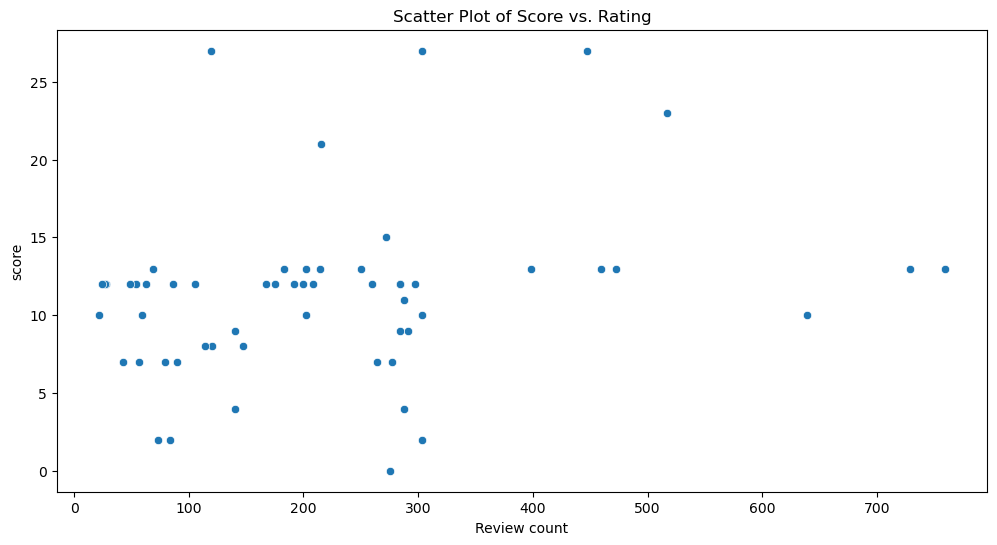

In [51]:
# Scatter Plot compairing review counts with inspection scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_count', y='SCORE', data=merged_df)
plt.title('Scatter Plot of Score vs. Rating')
plt.xlabel('Review count')
plt.ylabel('score')
plt.show()

## **Hypothesis Test 3:Try to find correlation between the inspection scores and the ratings on Yelp**

- Null Hypothesis: There is no significant correlation between the inspection scores and the ratings on Yelp.

- Alternative Hypothesis: There is a significant correlation between the inspection scores and the ratings on Yelp.

In [52]:
# Perform Pearson correlation test
if len(merged_df['rating']) < 2 or len(merged_df['SCORE']) < 2:
    print("Not enough data points to perform the correlation test.")
else:
    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_df['rating'], merged_df['SCORE'])

    # Print results
    print(f'Correlation: {correlation:.2f}')
    print(f'P-value: {p_value:.4f}')

    # Check for significance based on the p-value
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('There is no significant correlation.')

Correlation: -0.10
P-value: 0.4644
There is no significant correlation.


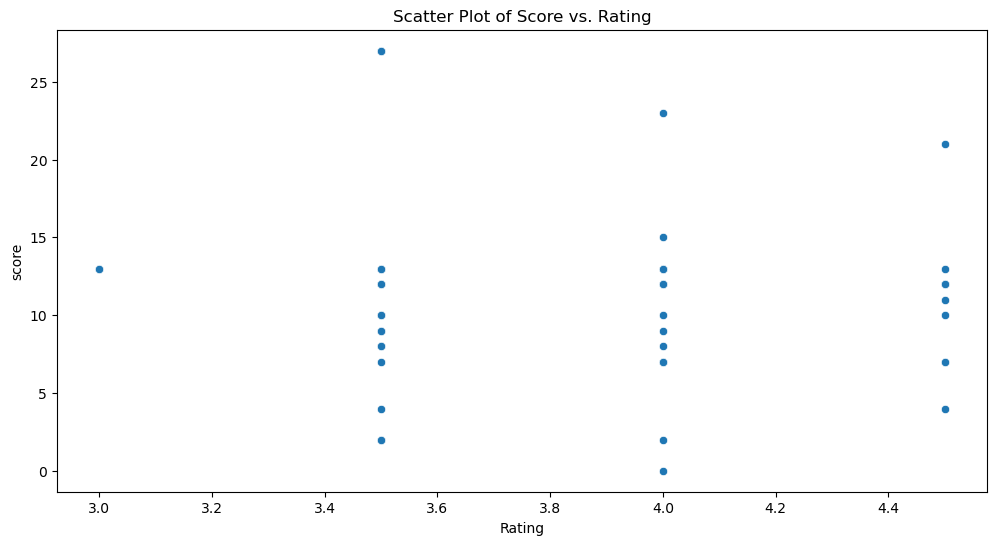

In [53]:
# Scatter Plot compairing review counts with inspection scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rating', y='SCORE', data=merged_df)
plt.title('Scatter Plot of Score vs. Rating')
plt.xlabel('Rating')
plt.ylabel('score')
plt.show()

# **Summary of Hypothesis Testing results**

In this notebook, we conducted multiple hypothesis tests to explore potential correlations between ratings and review counts, and inspection scores with review counts. Despite our efforts, none of the tests revealed statistically significant correlations between the variables under investigation. So as far as Pizza restaurants in Brooklyn, NY, there is no correlation that supports a theory of better inspection scores mean better ratings on YELP. The size of the data seems to be the cause for the lack of correlation because there is simply too much data.